# Title

Description

## Preliminaries

Begin by imposting the necessary modules.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next, load the data.

In [3]:
file = '../data/trade_data.csv'

In [4]:
df = pd.read_csv(file)

View a sample of the data.

In [5]:
df.sample()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
42111,2016,II,Dendrobium griffithianum,NaN,Orchidales,Orchidaceae,Dendrobium,FR,TH,NaN,30.0,NaN,cultures,NaN,T,A


Ok, we have the data loaded into a dataframe object. Let's begin the EDA.

## EDA

Count how many entries are for the year 2016. Compute a ratio against the total number of entries.

In [6]:
df_2016 = df[df['Year'] == 2016]

In [7]:
print('The number of entries for 2016 is: ', len(df_2016))

The number of entries for 2016 is:  67007


In [8]:
len(df_2016)/len(df)

0.9977070025758997

So, most entries are from 2016. Let's just focus on those records. 

### Questions
Are there major importers or exporters?


In [12]:
df_2016['Importer'].value_counts()

US    9678
JP    5189
DE    4906
FR    2603
HK    2555
CH    2504
CN    2122
SG    1576
AE    1506
CA    1408
KR    1323
GB    1258
IT    1215
TW    1179
TR     999
NO     949
RU     940
TH     898
QA     813
NL     757
ES     748
KW     732
MY     718
MX     667
AU     598
ZA     582
NZ     562
UA     525
AT     519
XX     515
      ... 
GD       4
CC       4
SY       4
BW       4
BO       4
BZ       3
PG       3
YE       3
ER       3
ML       3
GN       2
VI       2
VC       2
GQ       2
DJ       2
TD       2
TL       2
LR       2
YT       2
TK       2
GY       2
TF       2
BF       1
WS       1
TC       1
KI       1
DM       1
GM       1
AI       1
CF       1
Name: Importer, Length: 215, dtype: int64

The US was the top importer in 2016.

In [13]:
df_2016['Exporter'].value_counts()

NL    7199
ID    6526
IT    5116
US    4502
FR    3736
DE    2653
CN    1506
EC    1501
SG    1496
CH    1484
TH    1437
AU    1416
ZA    1404
MY    1357
PE    1275
ES    1273
BE    1234
PH    1156
GB    1144
CA    1135
JP    1053
AE     969
MG     927
HK     847
CZ     752
TW     670
ZW     561
FJ     510
CO     498
BR     494
      ... 
BL       4
VC       4
BW       3
AD       3
TD       3
SL       3
CV       3
AW       3
ME       3
KP       3
KI       3
XV       3
LI       2
GI       2
BI       2
KM       2
CY       2
ER       2
TK       1
GP       1
FO       1
TL       1
BA       1
NE       1
SZ       1
AN       1
WS       1
LS       1
IM       1
DD       1
Name: Exporter, Length: 210, dtype: int64

NL was the major exporter. From the data dictionary, this is the Netherlands.

The reported purpose of the transaction is shown as a one-letter code: I wonder for what porpose did the US import?.

In [38]:
df_2016[df_2016['Importer']=='US'].groupby(['Purpose']).sum()

,Year,Importer reported quantity,Exporter reported quantity
Purpose,,,
B,24192,84735.00,3.300000e+01
E,100800,3159.00,2.000000e+00
H,1056384,24453.61,2.537000e+03
L,20160,37.00,2.086000e+01
M,381024,295266.46,4.981716e+04
N,6048,305004.00,0.000000e+00
P,3140928,192660.01,7.354531e+03
Q,237888,723.00,1.815000e+02
S,1874880,78553.24,4.745312e+04


Hm, that alot of info. Let's narrow this down, more. According to the data dictionary, 'Z' represents Zoo.

In [51]:
df_2016[(df_2016['Importer']=='US') & 
        (df_2016['Purpose']=='Z')].groupby(['Term']).sum()

,Year,Importer reported quantity,Exporter reported quantity
Term,,,
live,189504,603.0,76.0
specimens,4032,3.5,0.0


Let's compare with another country.



In [81]:
x = df_2016[(df_2016['Purpose']=='Z')].groupby(['Importer']).sum()
x = x.drop('Year',axis=1)
x = x.drop('Exporter reported quantity',axis=1)
y = x['Importer reported quantity'].nlargest(3)
y

Importer
FR    4627.0
CN    3855.0
US     606.5
Name: Importer reported quantity, dtype: float64

In [82]:
df_2016[(df_2016['Importer']=='FR') & 
        (df_2016['Purpose']=='Z')].groupby(['Term']).sum()

,Year,Importer reported quantity,Exporter reported quantity
Term,,,
bodies,2016,1.0,0.0
live,98784,4626.0,42.0
specimens,2016,0.0,5.0


In [83]:
df_2016[(df_2016['Importer']=='CN') & 
        (df_2016['Purpose']=='Z')].groupby(['Term']).sum()

,Year,Importer reported quantity,Exporter reported quantity
Term,,,
live,149184,3855.0,194.0


Let's make a histogram out of this information.

TypeError: float() argument must be a string or a number, not 'NoneType'

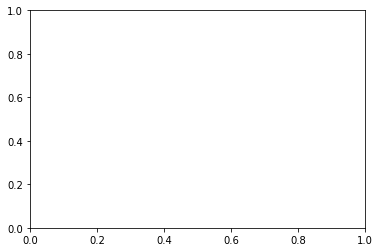

In [69]:
plt.bar(x, 2)
plt.show()